In [31]:
import numpy as np

data=np.load('ModelData/data.npy')
target=np.load('ModelData/target.npy')
data.shape[1:]

(128, 64, 1)

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


early_stop = EarlyStopping(
    monitor='val_loss',       # You can also monitor 'val_accuracy'
    patience=15,              # Stop after 20 epochs with no improvement
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.4,               # Reduce learning rate by half
    patience=15,               # Wait 15 epochs before reducing
    min_lr=1e-6,              # Don't go below this learning rate
    verbose=1
)

model = Sequential()

# Convolutional Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=data.shape[1:]))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Convolutional Block 2
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Global Pooling instead of Flatten
model.add(GlobalAveragePooling2D())

# Fully Connected Layers with Regularization
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(target.shape[1], activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary
model.summary()

/home/andrew/Documents/University Work/EG505P/.venv/lib64/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/andrew/Documents/University Work/EG505P/.venv/lib64/python3.13/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 128, 64, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128, 64, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 128, 64, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 64, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 64, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 64, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 64, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 64, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 32, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 32, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,931 (488.01 KB)

 Trainable params: 124,547 (486.51 KB)

 Non-trainable params: 384 (1.50 KB)

In [33]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [34]:
# Convert one-hot encoded labels to class indices
y_integers = np.argmax(train_target, axis=1)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_integers),
    y=y_integers
)

# Convert to dictionary format
class_weights_dict = dict(enumerate(class_weights))

print("Train target shape:", train_target.shape)
print("Validation target shape:", test_target.shape)

history = model.fit(
    train_data,
    train_target,
    validation_data=(test_data, test_target),
    epochs=90,
    callbacks=[early_stop,reduce_lr],
    class_weight = class_weights_dict
)

Train target shape: (894, 3)
Validation target shape: (100, 3)
Epoch 1/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.3345 - loss: 1.4544 - val_accuracy: 0.4600 - val_loss: 1.3113 - learning_rate: 0.0010
Epoch 2/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.3635 - loss: 1.3100 - val_accuracy: 0.2600 - val_loss: 1.2865 - learning_rate: 0.0010
Epoch 3/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.4329 - loss: 1.2519 - val_accuracy: 0.2600 - val_loss: 1.2700 - learning_rate: 0.0010
Epoch 4/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.4407 - loss: 1.2211 - val_accuracy: 0.2600 - val_loss: 1.2569 - learning_rate: 0.0010
Epoch 5/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.4195 - loss: 1.1916 - val_accuracy: 0.2600 - val_loss: 1.2550 - learning_rate: 0.0010
Epoch 6/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.5034 - loss: 1.1592 - val_accuracy: 0.5200 - val_loss: 1.2432 - learning_rate: 0.0010
Epoch 7/90
28/28 ━━━━━━━━

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/stepWARNING:tensorflow:5 out of the last 14 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7f0e64613100> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
              precision    recall  f1-score   support

           0       0.94      0.77      0.85        44
           1       0.93      0.93      0.93        30
           2       0.74      0.96      0.83        26

    accuracy                           0.87       100
   macro avg       0.87      0.89      0.87       100
weighted avg       0.89      0.87      0.87       100

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


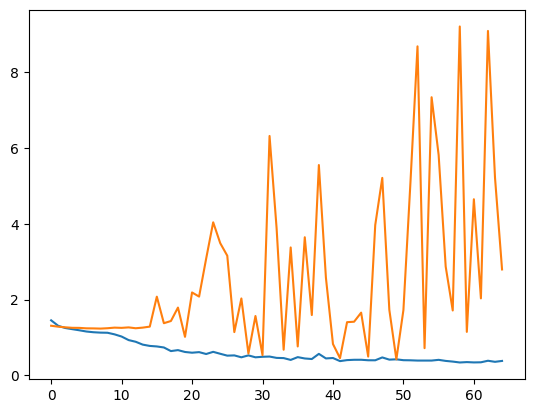

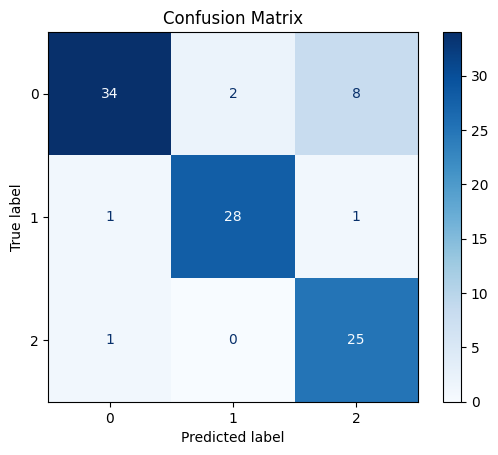

In [35]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Plot performance
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#Plot per-class accuracy
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_target, axis=1)
print(classification_report(y_true, y_pred_classes))

#Make confusion matrix
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_target, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



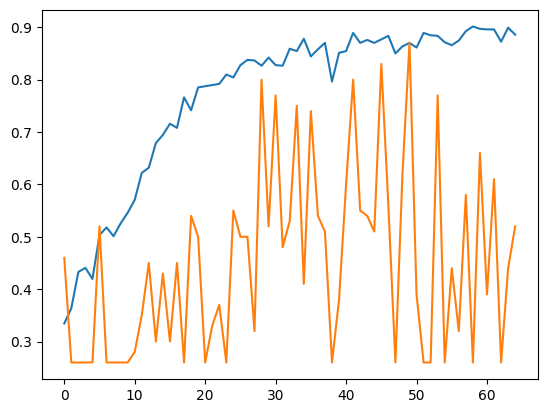

In [36]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [37]:


accc = model.evaluate(test_data,test_target)
print(accc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8700 - loss: 0.4240
[0.42399176955223083, 0.8700000047683716]


In [38]:
modelName = "Models/Model" + str(round(accc[1],4)) + ".h5"
model.save(modelName)